In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/jjong/Desktop/vscode/kaggle_src/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


C:\Users\jjong\AppData\Local\Temp\ipykernel_6836\2552638149.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data['age'], kde=True, palette='spring')


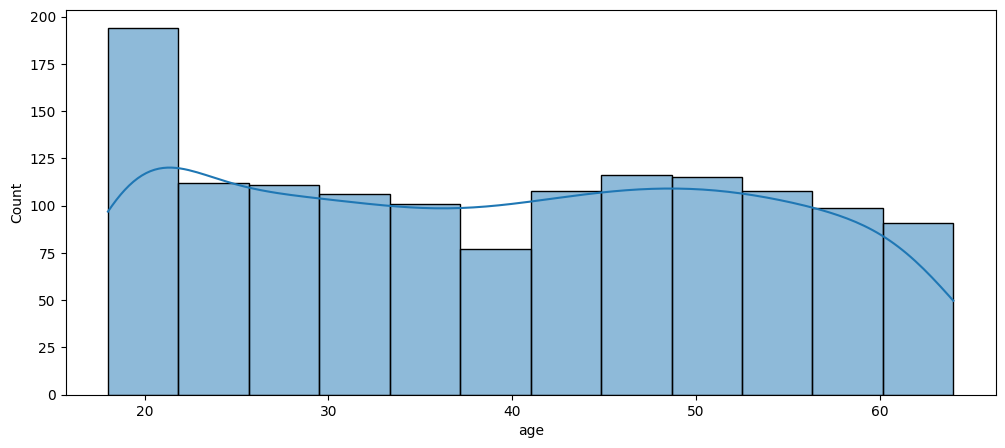

In [3]:
plt.figure(figsize=(12,5))
sns.histplot(x=data['age'], kde=True, palette='spring')
plt.show()

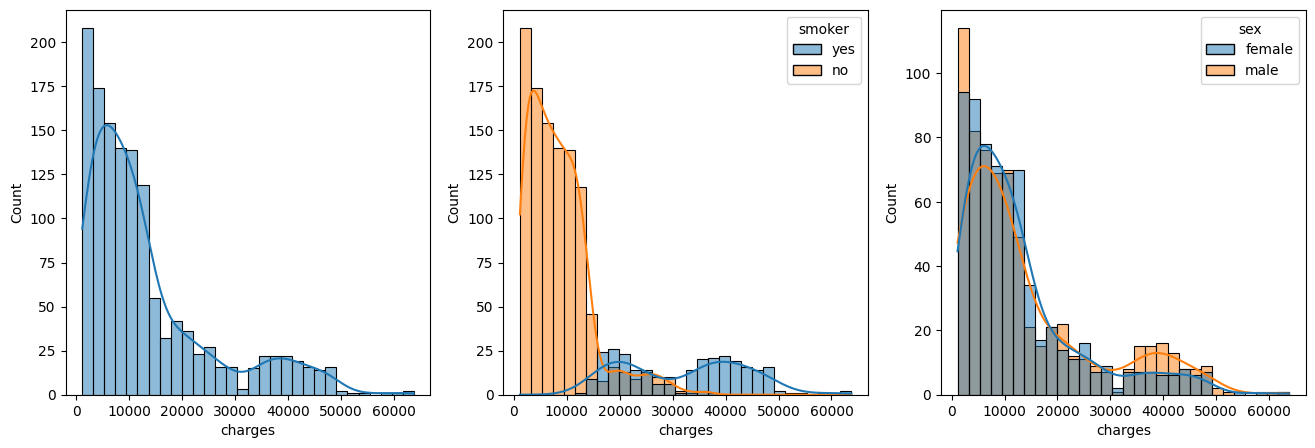

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(x='charges', data=data, kde=True, ax=ax[0])
sns.histplot(x='charges', data=data, kde=True, hue='smoker', ax=ax[1])
sns.histplot(x='charges', data=data, kde=True, hue='sex', ax=ax[2])
plt.show()

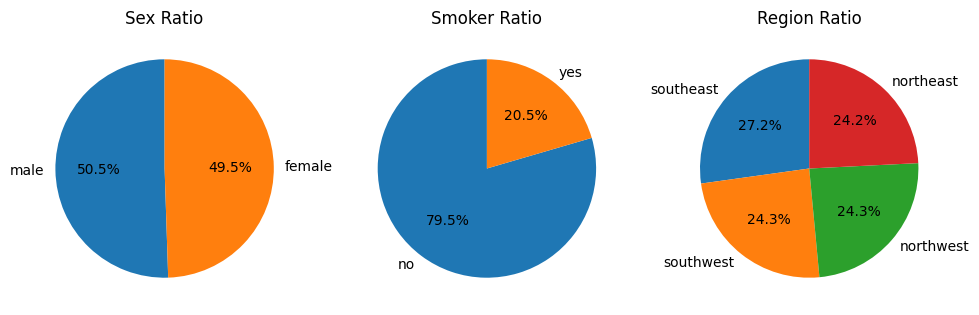

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes[0].pie(x=data['sex'].value_counts(), labels=data['sex'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sex Ratio')
axes[1].pie(x=data['smoker'].value_counts(), labels=data['smoker'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Smoker Ratio')
axes[2].pie(x=data['region'].value_counts(), labels=data['region'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Region Ratio')
plt.tight_layout()
plt.show()

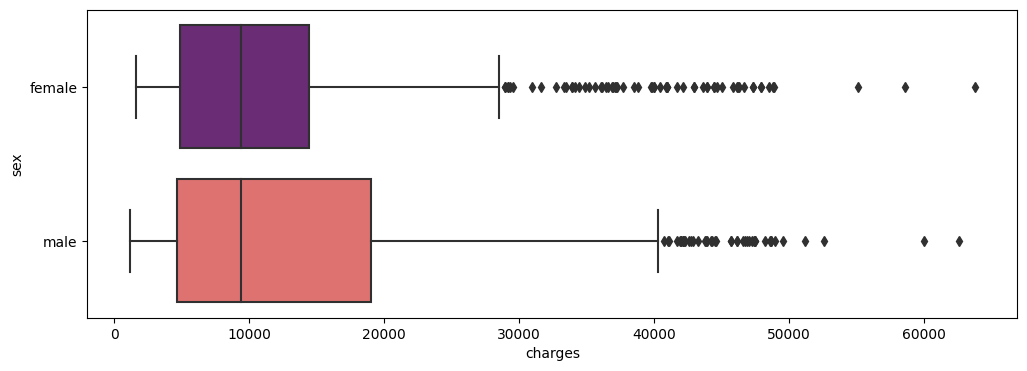

In [6]:
sex = data.groupby('sex')['charges'].mean()
plt.figure(figsize=(12,4))
sns.boxplot(y=data['sex'], x=data['charges'], palette='magma')
# plt.yscale('log')
plt.show()

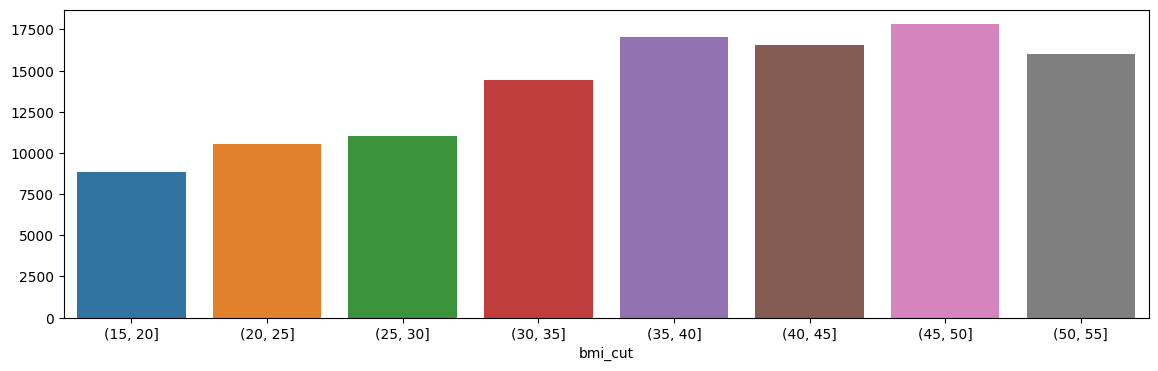

In [5]:
data['bmi_cut'] = pd.cut(data['bmi'], bins=np.arange(15, 60, 5), right=True)
bmi_cut = data.groupby('bmi_cut')['charges'].mean()
plt.figure(figsize=(14,4))
sns.barplot(x=bmi_cut.index, y=bmi_cut.values)
plt.show()

c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

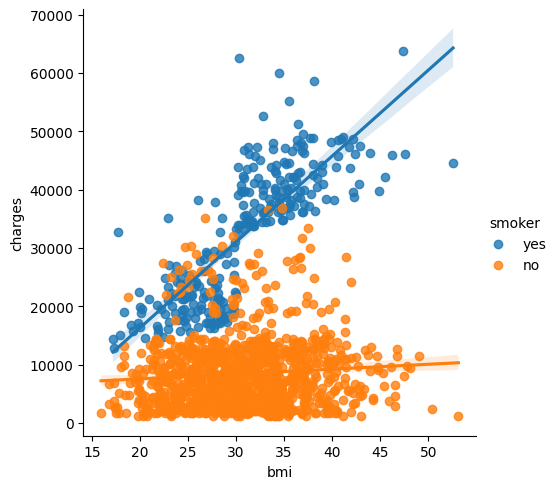

In [12]:
plt.figure()
sns.lmplot(data=data, x='bmi', y='charges', hue='smoker')
plt.show()

<Figure size 640x480 with 0 Axes>

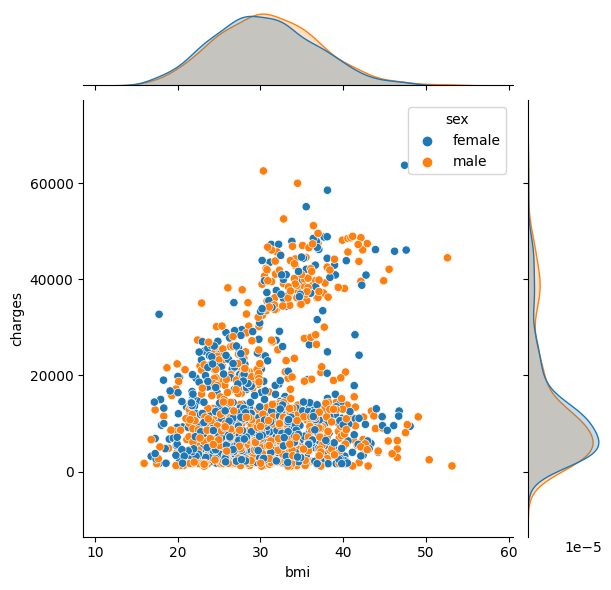

In [29]:
plt.figure()
sns.jointplot(x=data['bmi'], y=data['charges'], hue=data['sex'], color='c')
plt.show()

c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

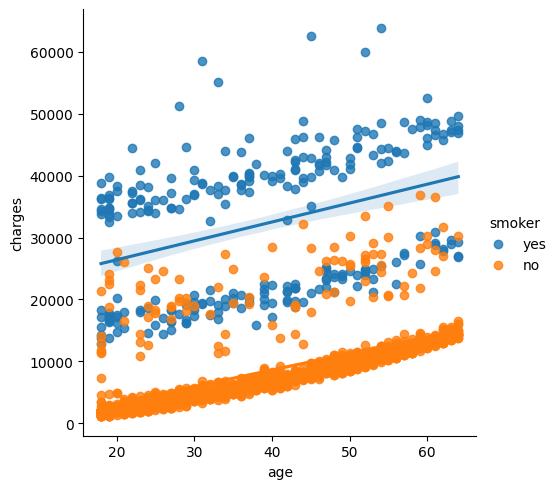

In [8]:
plt.figure()
sns.lmplot(x='age', y='charges', hue='smoker', data=data)
plt.show()

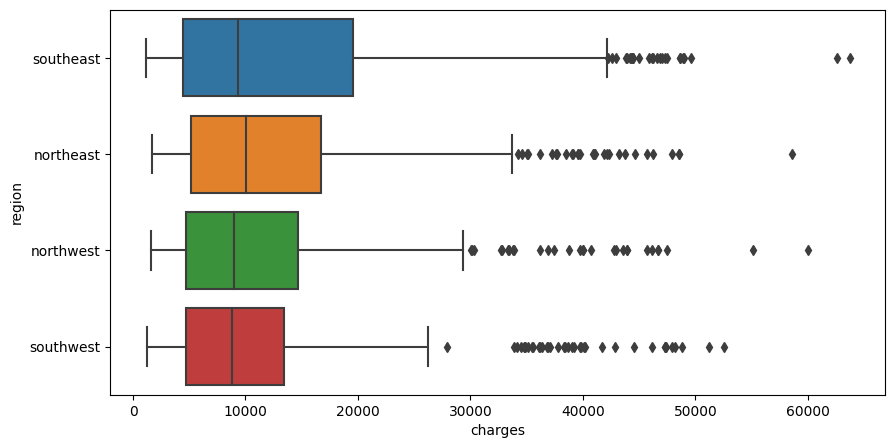

In [41]:
region_order = data.groupby('region')['charges'].mean().reset_index().sort_values(by='charges', ascending=False)['region'].tolist()
plt.figure(figsize=(10,5))
sns.boxplot(x='charges', y='region', data=data, order=region_order)
plt.show()

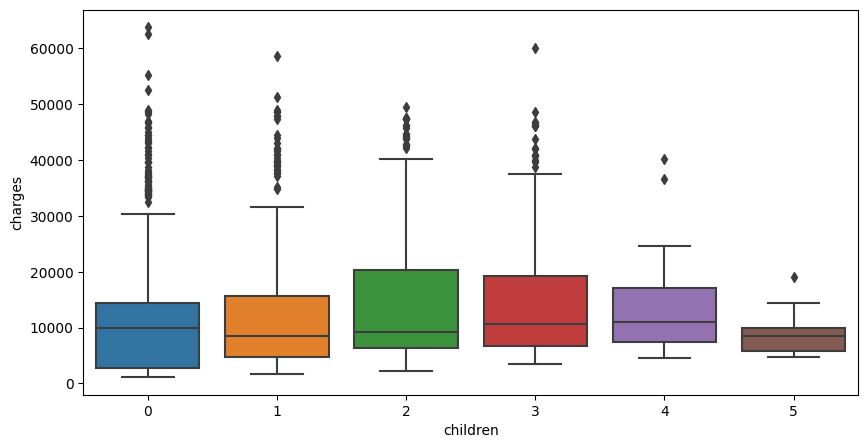

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='children', y='charges', data=data)
plt.show()

In [61]:
data

,age,sex,bmi,children,smoker,region,charges,bmi_cut
0,19,female,27.900,0,yes,southwest,16884.92400,"(25, 30]"
1,18,male,33.770,1,no,southeast,1725.55230,"(30, 35]"
2,28,male,33.000,3,no,southeast,4449.46200,"(30, 35]"
3,33,male,22.705,0,no,northwest,21984.47061,"(20, 25]"
4,32,male,28.880,0,no,northwest,3866.85520,"(25, 30]"
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,"(30, 35]"
1334,18,female,31.920,0,no,northeast,2205.98080,"(30, 35]"
1335,18,female,36.850,0,no,southeast,1629.83350,"(35, 40]"
1336,21,female,25.800,0,no,southwest,2007.94500,"(25, 30]"


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = data.drop('bmi_cut', axis=1).copy()
df['sex'] = df['sex'].map(lambda x: 0 if x == 'male' else 1)
df['smoker'] = df['smoker'].map(lambda x: 0 if x == 'no' else 1)
df = pd.get_dummies(df)

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [7]:
X_train.shape, y_train.shape

((1070, 9), (1070,))

In [8]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.41304348, 1.        , 0.61250683, ..., 0.        , 1.        ,
        0.        ],
       [0.7826087 , 1.        , 0.4565811 , ..., 0.        , 0.        ,
        0.        ],
       [0.17391304, 0.        , 0.83478973, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.60869565, 1.        , 0.38885855, ..., 0.        , 0.        ,
        1.        ],
       [0.63043478, 0.        , 0.62752594, ..., 0.        , 1.        ,
        0.        ],
       [0.32608696, 0.        , 0.39022392, ..., 0.        , 1.        ,
        0.        ]])

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

Validation Set:
MAE: 2966.3416151229326
MSE: 30097122.74374169
RMSE: 5486.0844637812215
MAPE: 0.3798174140860732


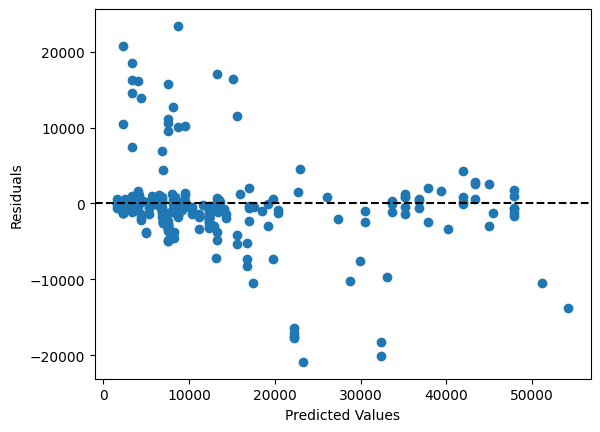

In [24]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation Set:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

# 잔차 그래프 그리기
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

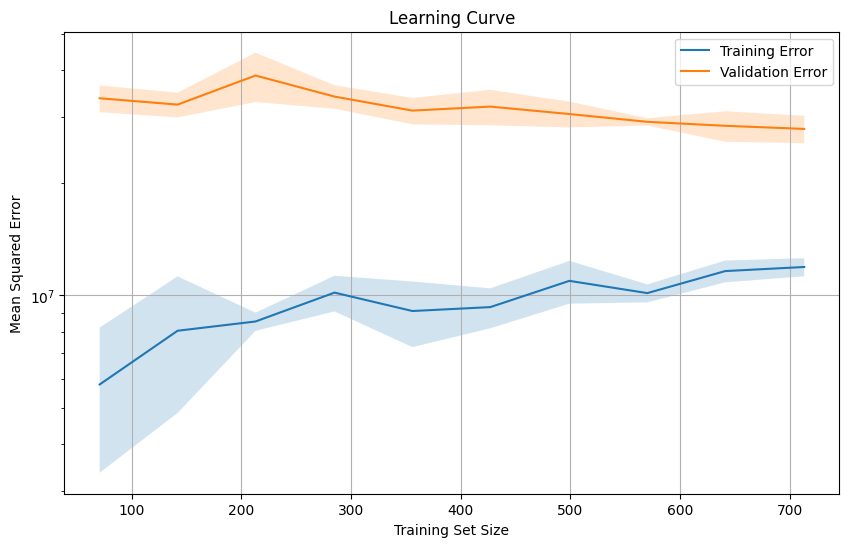

In [25]:
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve


# 학습곡선
sizes, train_scores, val_scores = learning_curve(estimator=dt, X=X_train, y=y_train,
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label='Training Error')
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(sizes, val_mean, label='Validation Error')
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.yscale('log')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

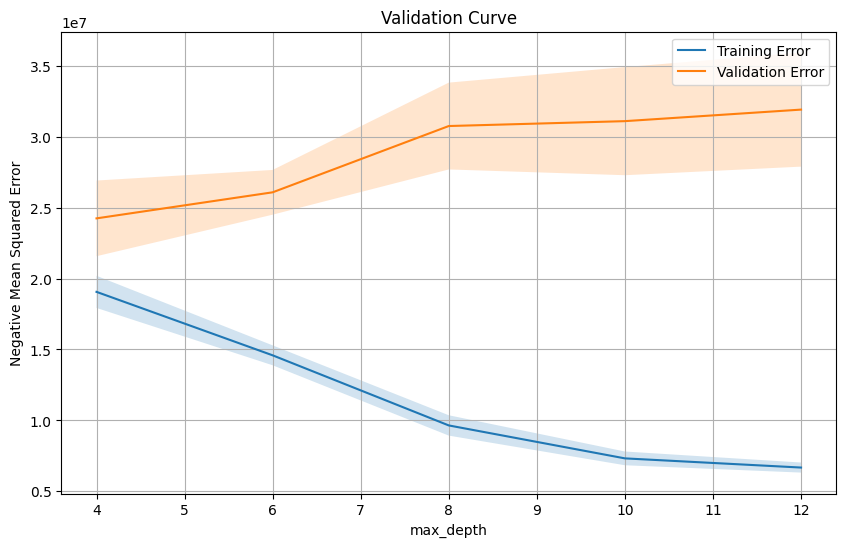

In [27]:
# 검증곡선
param_range = [4, 6, 8, 10, 12]
train_scores, test_scores = validation_curve(dt, X_train, y_train, param_name="max_depth", 
                                             param_range=param_range, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Error')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.2)

plt.plot(param_range, test_mean, label='Validation Error')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.2)

# plt.yscale('log')
plt.xlabel('max_depth')
plt.ylabel('Negative Mean Squared Error')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=2, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Validation Set:
MAE: 2504.2211039387566
MSE: 20289004.13889653
RMSE: 4504.331708355472
MAPE: 0.3173939453246156


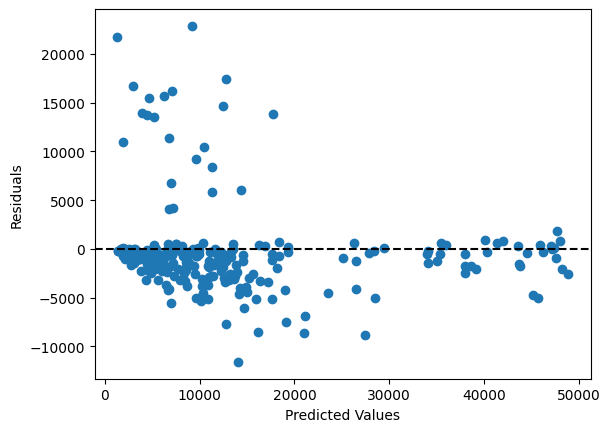

In [29]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation Set:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

# 잔차 그래프 그리기
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

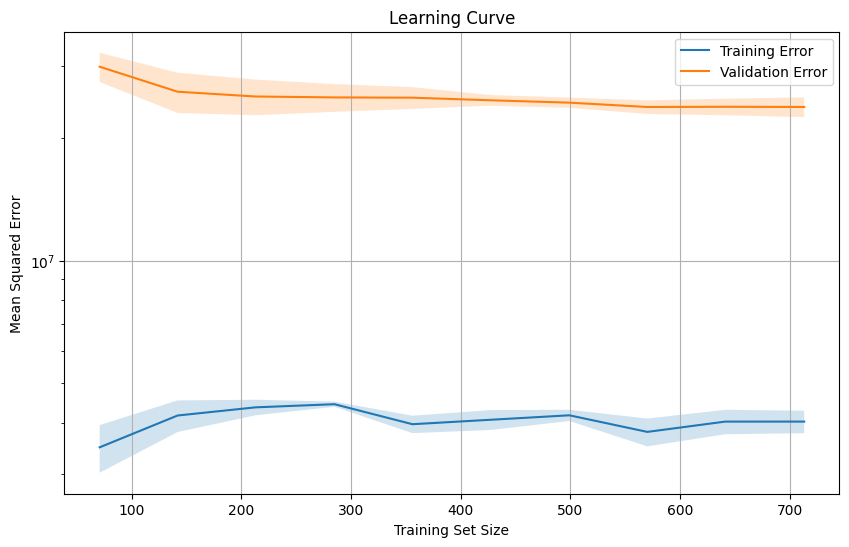

In [30]:
# 학습곡선
sizes, train_scores, val_scores = learning_curve(estimator=rf, X=X_train, y=y_train,
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label='Training Error')
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(sizes, val_mean, label='Validation Error')
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.yscale('log')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [9]:
import xgboost as xgb

xg = xgb.XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)

xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)

Validation Set:
MAE: 2422.081086556961
MSE: 19309603.793128528
RMSE: 4394.269426551873
MAPE: 0.29586658653457115


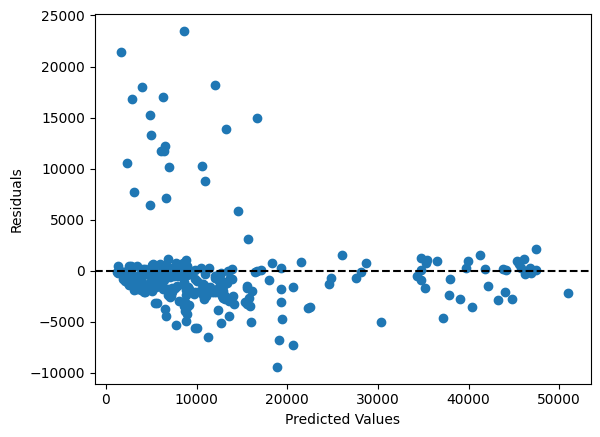

In [10]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation Set:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

# 잔차 그래프 그리기
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

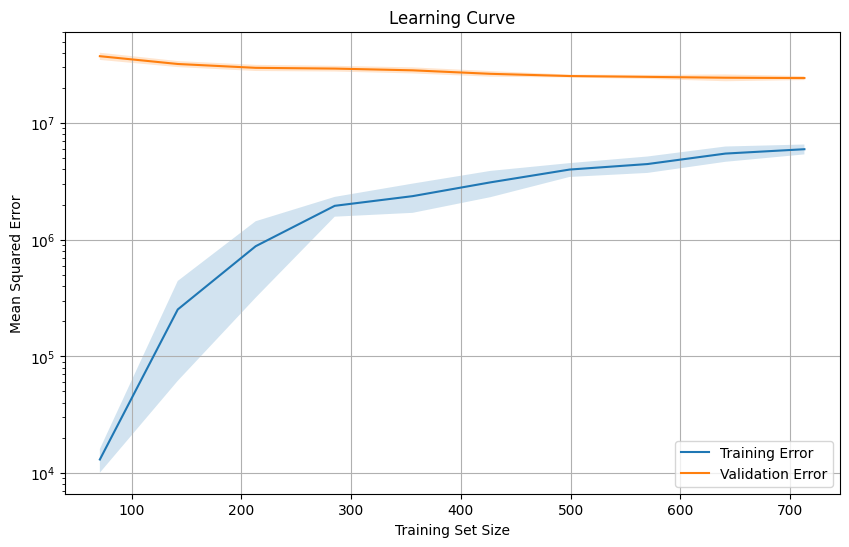

In [12]:
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve


# 학습곡선
sizes, train_scores, val_scores = learning_curve(estimator=xg, X=X_train, y=y_train,
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label='Training Error')
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(sizes, val_mean, label='Validation Error')
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.yscale('log')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()